<h1>HW3</h1>
    <h2>Patrick Dahl - 677112631</h2>
    <h3>See written notes for #1</h3>

<h2>#2</h2>

If $$f(x,y)=-\ln(1-x-y)-\ln(x)-\ln(y)$$
then the gradient of f is: $$\nabla(f) = 
                                        \begin{bmatrix} \frac{1}{1-x-y}-\frac{1}{x} \\
                                                        \frac{1}{1-x-y}-\frac{1}{y}
                                        \end{bmatrix} $$
and the Hessian of f is: $$H_f = 
                                \begin{bmatrix} \frac{1}{(1-x-y)^2}+\frac{1}{x^2} & \frac{1}{(1-x-y)^2} \\
                                                \frac{1}{(1-x-y)^2} & \frac{1}{(1-x-y)^2}+\frac{1}{y^2}
                                \end{bmatrix} $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -2-

#guarantee w0 no outside of D
inD = 0;
while not inD:
    w0 = np.random.random(2)
    if w0.sum()<1:
        inD = 1;

print('w0 = [%f, %f]' % (w0[0],w0[1]))

w0 = [0.042934, 0.420688]


In [2]:
# define function, gradient and Hessian
def f(arry):
    x = arry[0]
    y = arry[1]
    return -(np.log(1-(x+y))+np.log(x)+np.log(y))

def g(arry):
    x = arry[0]
    y = arry[1]
    
    #single comp:
    a = 1-(x+y)
    
    #gradient
    grad = np.array([(1/a)-(1/x),(1/a)-(1/y)])
    return grad

def H(arry):
    x = arry[0]
    y = arry[1]
    
    #single comp:
    a = pow(1-(x+y),2)
    y2 = pow(y,2)
    
    #Hessian
    hess = np.array([[(1/a)+(1/pow(x,2)),1/a],[1/a,(1/a)+(1/pow(y,2))]])
    return hess

print(f(w0))
print(g(w0))
print(H(w0))

4.636874537881758
[-21.42729022  -0.51270434]
[[545.97658275   3.47582149]
 [  3.47582149   9.12623504]]


In [3]:
#Gradient descent
wprev = np.zeros(2)
w = w0
eta = 0.01 #learning rate

#error threshold
eps = pow(10,-7)
#error
err = np.sum(np.absolute(wprev-w))

#domain values
wg = [w0]

while err>eps:
    wprev = w
    w = w - (eta*g(w))
    err = np.sum(np.absolute(wprev-w))
    wg.append(w)

In [4]:
#define trajectory
fs = [f(arry) for arry in wg]
xs = [arry[0] for arry in wg]
ys = [arry[1] for arry in wg]

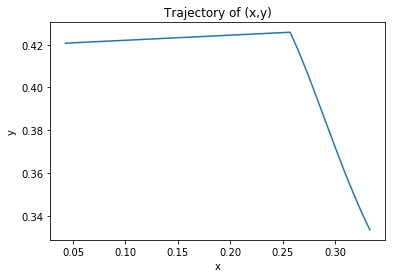

In [5]:
h1 = plt.plot(xs,ys)
h1 = plt.xlabel('x')
h1 = plt.ylabel('y')
h1 = plt.title('Trajectory of (x,y)')

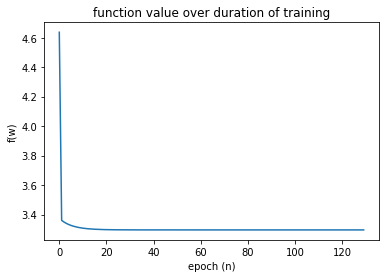

In [6]:
h2 = plt.plot(fs)
h2 = plt.xlabel('epoch (n)')
h2 = plt.ylabel('f(w)')
h2 = plt.title('function value over duration of training')

In [7]:
#Newton's Method
wprev = np.zeros(2)
w = w0
eta = 0.01 #learning rate

#error threshold
eps = pow(10,-7)
#error
err = np.sum(np.absolute(wprev-w))

#domain values
wn = [w0]

while err>eps:
    wprev = w
    Hinv = np.linalg.inv(H(w))
    w = w - (eta*np.dot(Hinv,g(w)))
    err = np.sum(np.absolute(wprev-w))
    wn.append(w)


In [8]:
fs = [f(arry) for arry in wn]
xs = [arry[0] for arry in wn]
ys = [arry[1] for arry in wn]

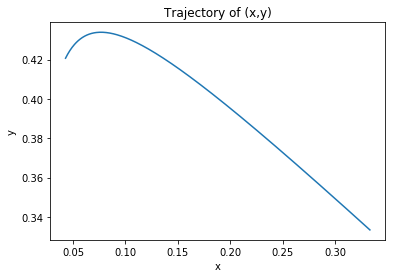

In [9]:
h3 = plt.plot(xs,ys)
h3 = plt.xlabel('x')
h3 = plt.ylabel('y')
h3 = plt.title('Trajectory of (x,y)')

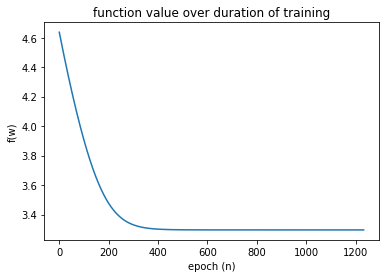

In [10]:
h4 = plt.plot(fs)
h4 = plt.xlabel('epoch (n)')
h4 = plt.ylabel('f(w)')
h4 = plt.title('function value over duration of training')

In [11]:
# Newton's Method -- more optimal eta
#
# eta = 0.01 is low enough to be stable for gradient descent,
# but is not necessarily optimal for Newton's method
#

wprev = np.zeros(2)
w = w0
eta = 1 #learning rate

#error threshold
eps = pow(10,-7)
#error
err = np.sum(np.absolute(wprev-w))

#domain values
wn = [w0]

while err>eps:
    wprev = w
    Hinv = np.linalg.inv(H(w))
    w = w - (eta*np.dot(Hinv,g(w)))
    err = np.sum(np.absolute(wprev-w))
    wn.append(w)


In [12]:
fs = [f(arry) for arry in wn]
xs = [arry[0] for arry in wn]
ys = [arry[1] for arry in wn]

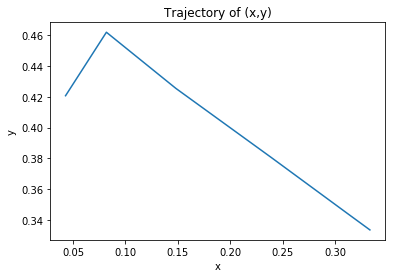

In [13]:
h5 = plt.plot(xs,ys)
h5 = plt.xlabel('x')
h5 = plt.ylabel('y')
h5 = plt.title('Trajectory of (x,y)')

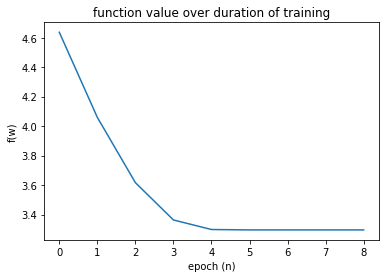

In [14]:
h6 = plt.plot(fs)
h6 = plt.xlabel('epoch (n)')
h6 = plt.ylabel('f(w)')
h6 = plt.title('function value over duration of training')

With a more reasonable learning rate, Newton's method is much quicker to converge than gradient descent (in terms of number of epochs). Of note, the trajectory of w is different when Newton's method is applied than when gradient descent is applied.

<h2>#3</h2>

[ 1.00228987 -0.13482408]


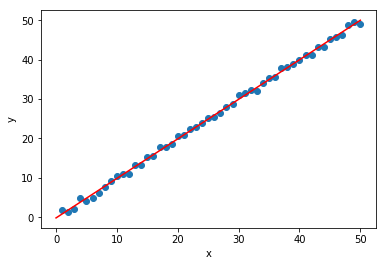

In [86]:
x = np.array([ii for ii in range(1,51)]) #independent data
y = np.array([ii+(2*np.random.random())-1 for ii in x.tolist()]) #data + noise (measurement)

A = np.vstack([x, np.ones(len(x))]).T #augment data to be affine

lls = np.array(np.dot(np.matmul(np.linalg.inv(np.matmul(A.T,A)),A.T),y)) #LLS the hard way

#plot stuff
xlls = [0,50]
ylls = [lls[1],(lls[0]*xlls[1])+lls[1]]

h7 = plt.scatter(x.tolist(),y.tolist())
h7 = plt.plot(xlls,ylls, 'r')
h7 = plt.ylabel('y')
h7 = plt.xlabel('x')
print(lls)

See handwritten sheet for gradient analysis.

In [87]:
def g(x,y,w):
    w0 = w[0]
    w1 = w[1]
    g0 = np.sum([-2*(y[ii]-(w0+(w1*x[ii]))) for ii in list(range(len(x)))])
    g1 = np.sum([-2*x[ii]*(y[ii]-(w0+(w1*x[ii]))) for ii in list(range(len(x)))])
    
    return np.array([g0,g1])
    
#w0 = np.random.random(2)
w0 = np.array([1,1])

#Gradient descent
wprev = np.zeros(2)
w = w0
eta = 0.00002 #learning rate

#error threshold
eps = pow(10,-7)
#error
err = np.sum(np.absolute(wprev-w))

#domain values
wl = [w0]

while err>eps:
    wprev = w
    w = w - (eta*g(x,y,w))
    err = np.sum(np.absolute(wprev-w))
    wl.append(w)
    
print(w)

[-0.13462386  1.00228392]


The values of w0 and w1 obtained by LLS and gradient descent are very similar. As can be seen by the eta for this exercise, GD continues to be very sensitive to the value of eta. Much higher than the value used results in instability.

See handwritten sheets for Newton's method analysis.